# Arla Foods: Data-Driven Decarbonization (A)			

![en_img](https://th.bing.com/th/id/OIP.3fxehnl31WX9DCxwcRt7fgHaFj?rs=1&pid=ImgDetMain)

Harvard Business School Case 624-003								
Student data supplement 624-031								
								
This course software was prepared solely as the basis for class discussion. Cases are not intended to serve as endorsements, sources of primary data, or illustrations of effective or ineffective management. Copyright © 2023, 2024 President and Fellows of Harvard College. No part of this product may be reproduced, stored in a retrieval system, used in a spreadsheet, or transmitted in any form or by any means—electronic, mechanical, photocopying, recording, or otherwise—without the permission of Harvard Business School.								
								
								
								
								
								
The data in this dataset was prepared solely as the basis for class discussion. The data does not reflect actual Arla farm data.								
								
The variables in this dataset are as follows:								
Variable name	Metric							
Feed_inefficiency	Kilograms feed per kilogram fat-and-protein-corrected milk (FPCM) produced at herd level. 							
Protein_efficiency	Nitrogen used for growth, beef, and milk as a percentage of total nitrogen intake.							
Animal_mortality	Cow mortality rate, calculated as the percentage of a farm’s herd that died in a given year.							
Fertilizer_use	Kilograms of gross nitrogen from manure and artificial fertilizer applied per hectare of land.							
Land_use	Square meters of land used to grow all feed (homegrown and purchased) for milk production, per kg of fat-and-protein-corrected milk (FPCM). 							
Soy_use	Grams of soy used in feed, per kilogram fat-and-protein-corrected milk (FPCM).							
Permanent_grassland	Hectares per cow of permanent grassland or natural grassland primarily managed by grazing.							
Grazing	Percentage of cows grazing at least six hours per day, 120 days per year, using rotational/multi-paddock grazing management. 							
Manure_mgmt	1 if 75% or more of the manure is used to create biogas and/or manure slurry is acidified at the farm; otherwise 0							
Renewable_electricity_use	1 if 100% of farm's electricity is generated from wind, solar, biogas, and hydro; otherwise 0							
Carbon_footprint	Kilograms (kg) of CO2e per kg fat-and-protein-corrected milk (FPCM) produced							
								
Note:	CO2e referred to carbon dioxide equivalent (CO2e), a measure of greenhouse gas (GHG) emissions that aggregated the climate impact of							
	emissions of carbon dioxide, methane, nitrous oxide, and other GHGs. It was calculated by multiplying the quantities of each of 							
	these gases emitted by their respective emission factor, which reflected its global warming potential relative to carbon dioxide. 							
								
		
        
<h2>CRISP-DM MODEL</h2>

![eng_img](https://files.oaiusercontent.com/file-6nbCfDcS11QOaYpzTGg3WW9x?se=2024-08-31T15%3A07%3A24Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3D321195ac-d94a-4332-aa15-5439ee309084.webp&sig=DYsWhxLVICv4hLUMydaIcpI7I0RbQMaV4DIUo11%2Berw%3D)
								
								
								
								
								


# Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare

In [2]:
# Fetch the data excel and store the value in variable in df
df=pd.read_excel(r'C:\Users\hi\Documents\ayush\624031-XLS-ENG .xlsx',sheet_name='Synthetic_farm_data')

In [3]:
df.sample(5) # Fetch random data

,Feed_inefficiency,Protein_efficiency,Animal_mortality,Fertilizer_use,Land_use,Soy_use,Permanent_grassland,Grazing,Manure_biogas,Renewable_electricity_use,Carbon_footprint
2042,1.068,29.545,1.642,140.099,1.471,0.400,0.183205,65.468,0,0,1.034876
9710,0.878,30.367,3.629,421.018,1.856,27.199,0.143445,39.931,0,0,1.472153
707,0.706,32.782,10.217,174.785,1.441,0.421,0.459711,7.132,0,1,0.949715
7376,0.791,27.421,5.107,177.715,2.215,15.874,0.241958,19.325,0,0,1.207068
2519,0.901,28.459,4.713,156.982,1.114,1.518,0.460740,9.033,0,0,1.009301


In [4]:
df.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Feed_inefficiency          10000 non-null  float64
 1   Protein_efficiency         10000 non-null  float64
 2   Animal_mortality           10000 non-null  float64
 3   Fertilizer_use             10000 non-null  float64
 4   Land_use                   10000 non-null  float64
 5   Soy_use                    10000 non-null  float64
 6   Permanent_grassland        10000 non-null  float64
 7   Grazing                    10000 non-null  float64
 8   Manure_biogas              10000 non-null  int64  
 9   Renewable_electricity_use  10000 non-null  int64  
 10  Carbon_footprint           10000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 859.5 KB


In [5]:
df.columns # fetch the columns

Index(['Feed_inefficiency', 'Protein_efficiency', 'Animal_mortality',
       'Fertilizer_use', 'Land_use', 'Soy_use', 'Permanent_grassland',
       'Grazing', 'Manure_biogas', 'Renewable_electricity_use',
       'Carbon_footprint'],
      dtype='object')

In [6]:
df.describe() # check the dataset of mean,count, std, max, min,etc

,Feed_inefficiency,Protein_efficiency,Animal_mortality,Fertilizer_use,Land_use,Soy_use,Permanent_grassland,Grazing,Manure_biogas,Renewable_electricity_use,Carbon_footprint
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.006704,29.053928,4.973184,217.244996,1.414194,11.084532,0.884685,20.577083,0.103700,0.304400,1.128795
std,0.169530,4.112698,3.041632,88.883358,0.557979,16.462772,0.560567,16.906429,0.304886,0.460176,0.150066
min,0.700000,17.715000,0.000000,44.801000,0.610000,0.000000,0.100279,0.000000,0.000000,0.000000,0.744218
25%,0.880000,26.109500,2.629000,150.711750,0.980000,0.726750,0.433611,6.945000,0.000000,0.000000,1.023418
50%,0.989000,28.998000,4.328000,206.208000,1.313000,3.431500,0.772193,15.957000,0.000000,0.000000,1.110949
75%,1.115000,32.003000,6.691500,273.718750,1.739000,14.350500,1.234888,30.370750,0.000000,1.000000,1.213275
max,1.605000,38.491000,15.499000,489.690000,3.624000,86.388000,3.020298,72.921000,1.000000,1.000000,2.075455


# Process

<Axes: >

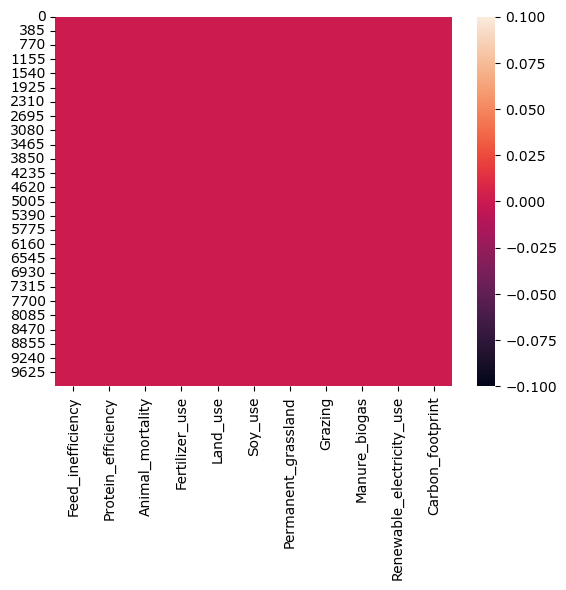

In [7]:
sns.heatmap(df.isnull()) # check the null value in dataset

Acc to heatmap, their is no null value. So, we do not need to perform data cleaning part, and their is no error in dataset

# Exploring Data Analysis

## Problem Explore
- Relationship Between Feed Inefficiency and Carbon Footprint: Analyzing how feed inefficiencies contribute to higher carbon emissions.
- Impact of Fertilizer Use on Animal Mortality and Protein Efficiency: Examining how fertilizer practices affect animal health and protein production efficiency.
- Key Drivers of Carbon Emissions: Determining the factors most significantly affecting carbon emissions within the company’s operations.

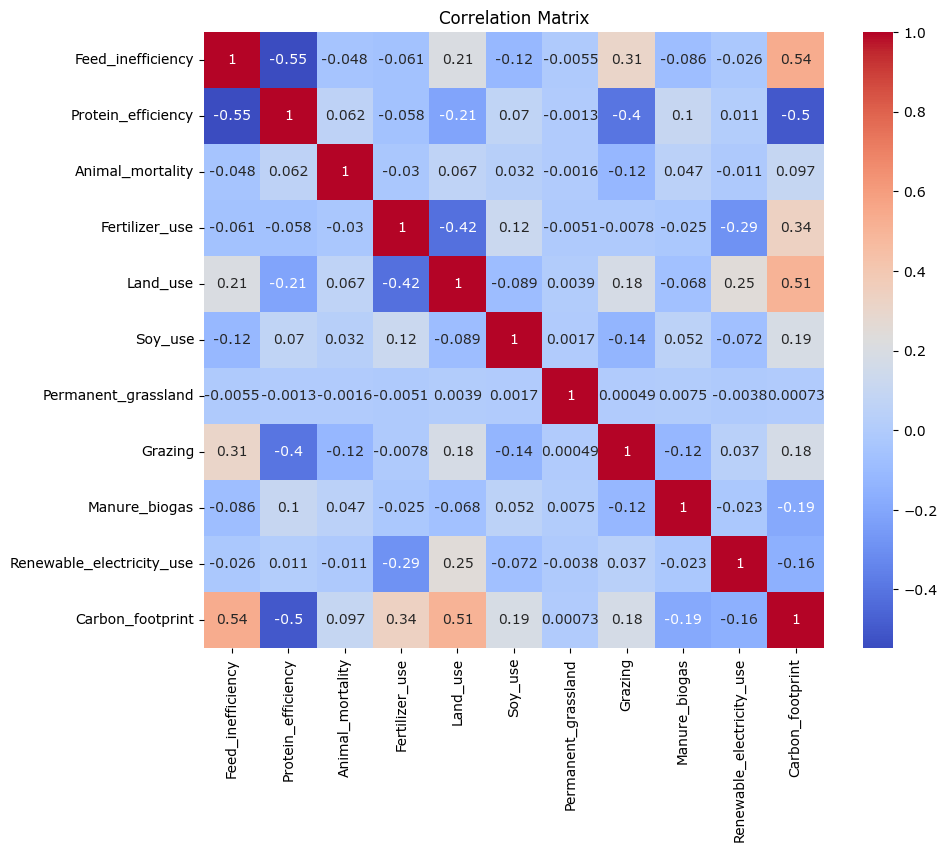

In [8]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Acc to correlation of variable, Feed inefficiency, land use, soy_use, and Grazing are directly proporation to carbon footprint.

## Data Visulization

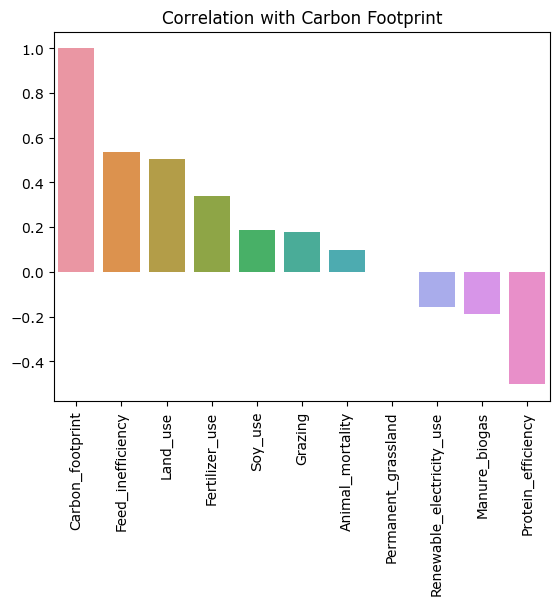

In [9]:
# Compute correlation values
correlation_values = df.corr()["Carbon_footprint"].sort_values(ascending=False)

# Create a bar plot
sns.barplot(x=correlation_values.index, y=correlation_values.values)
plt.title("Correlation with Carbon Footprint")
plt.xticks(rotation=90)
plt.show()


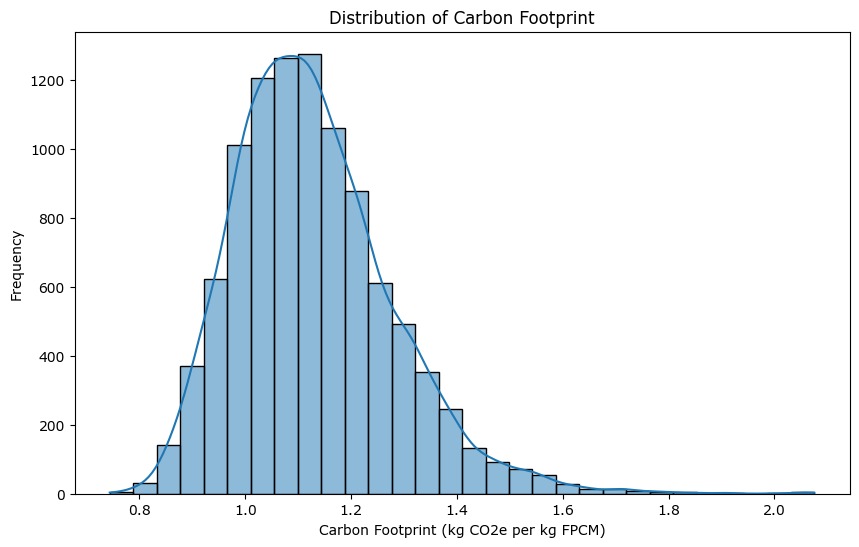

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbon_footprint'], bins=30, kde=True)
plt.title('Distribution of Carbon Footprint')
plt.xlabel('Carbon Footprint (kg CO2e per kg FPCM)')
plt.ylabel('Frequency')
plt.show()

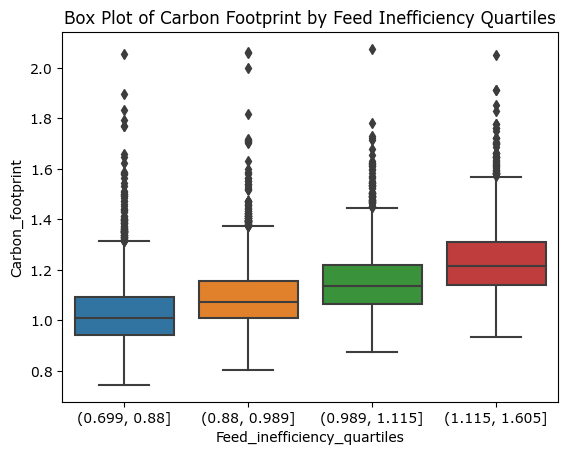

In [11]:
# Feed Inefficiency split into quartiles
new_df=df.iloc[:,:]
new_df["Feed_inefficiency_quartiles"] = pd.qcut(new_df["Feed_inefficiency"], 4)

# Create a box plot
sns.boxplot(x="Feed_inefficiency_quartiles", y="Carbon_footprint", data=new_df)
plt.title("Box Plot of Carbon Footprint by Feed Inefficiency Quartiles")
plt.show()

#also drop the the columns
# new_df.drop()

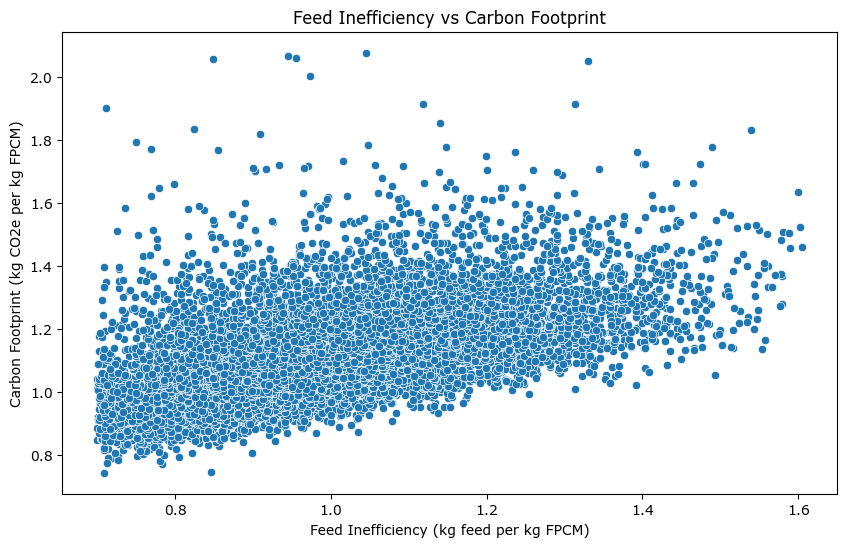

In [12]:
# Scatter plot of Feed Inefficiency vs Carbon Footprint
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feed_inefficiency', y='Carbon_footprint', data=df)
plt.title('Feed Inefficiency vs Carbon Footprint')
plt.xlabel('Feed Inefficiency (kg feed per kg FPCM)')
plt.ylabel('Carbon Footprint (kg CO2e per kg FPCM)')
plt.show()


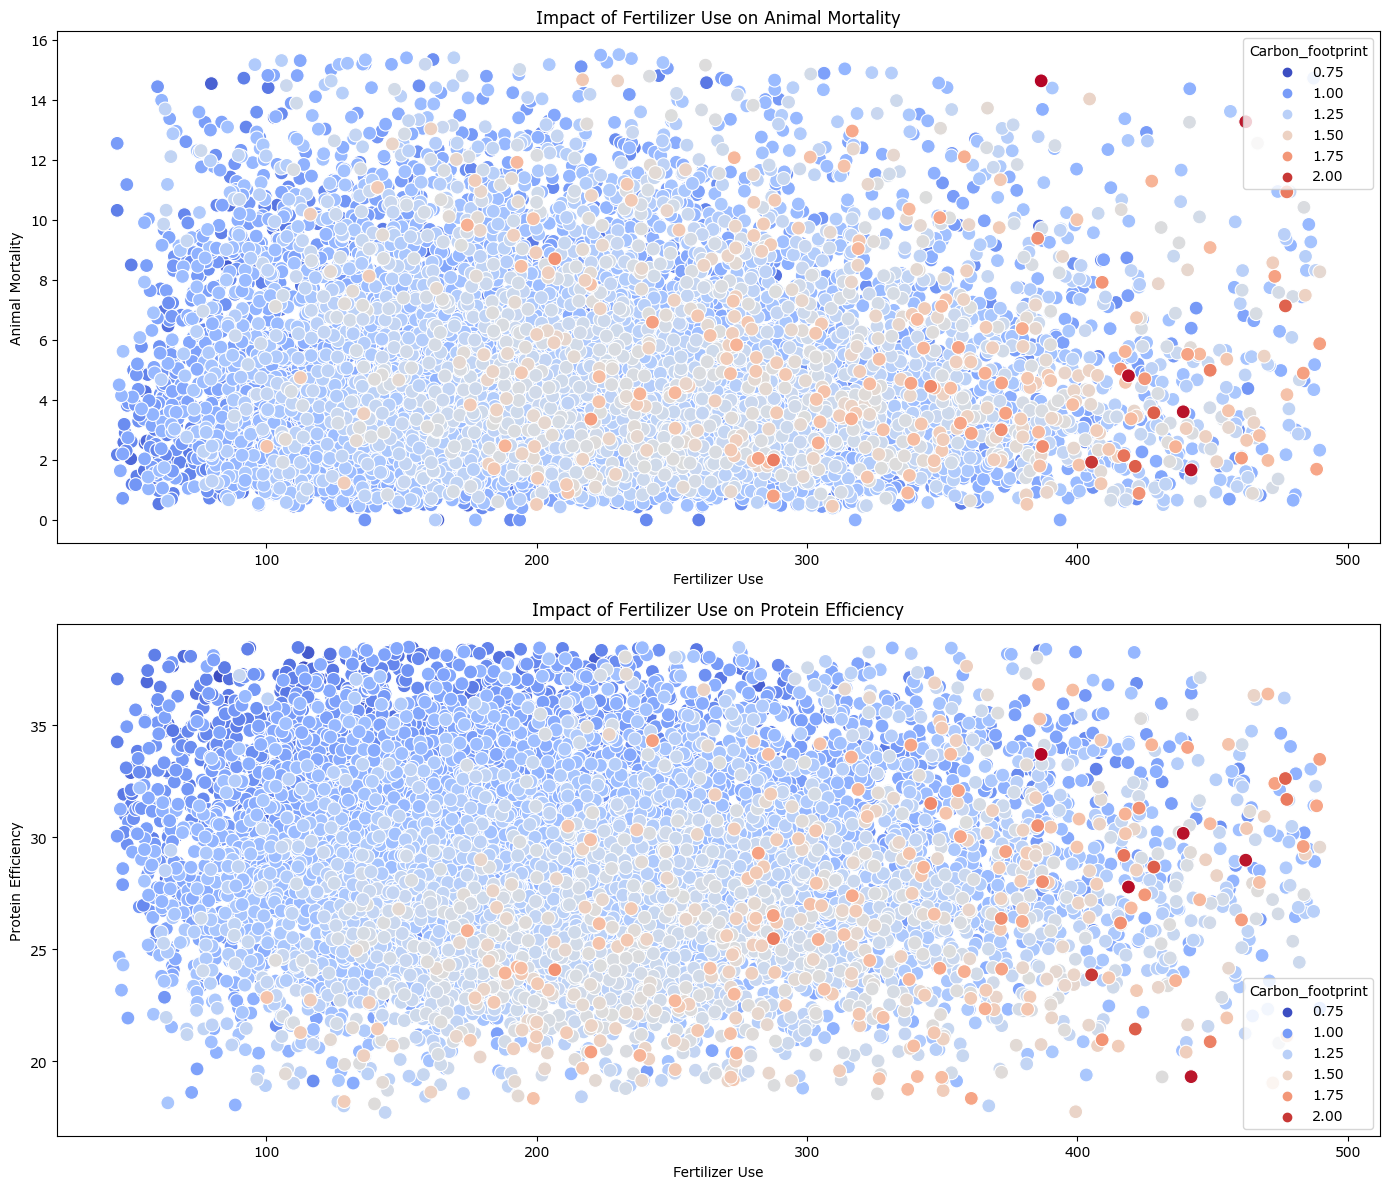

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# First subplot: Fertilizer Use vs. Animal Mortality
plt.subplot(2, 1, 1)
sns.scatterplot(data=df, x='Fertilizer_use', y='Animal_mortality', hue='Carbon_footprint', palette='coolwarm', s=100)
plt.title('Impact of Fertilizer Use on Animal Mortality')
plt.xlabel('Fertilizer Use')
plt.ylabel('Animal Mortality')

# Second subplot: Fertilizer Use vs. Protein Efficiency
plt.subplot(2, 1, 2)
sns.scatterplot(data=df, x='Fertilizer_use', y='Protein_efficiency', hue='Carbon_footprint', palette='coolwarm', s=100)
plt.title('Impact of Fertilizer Use on Protein Efficiency')
plt.xlabel('Fertilizer Use')
plt.ylabel('Protein Efficiency')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

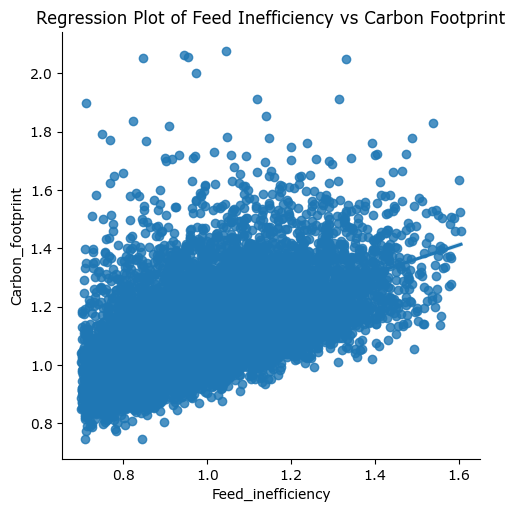

In [14]:
# Regression plot for Feed Inefficiency vs Carbon Footprint
sns.lmplot(x="Feed_inefficiency", y="Carbon_footprint", data=df)
plt.title("Regression Plot of Feed Inefficiency vs Carbon Footprint")
plt.show()

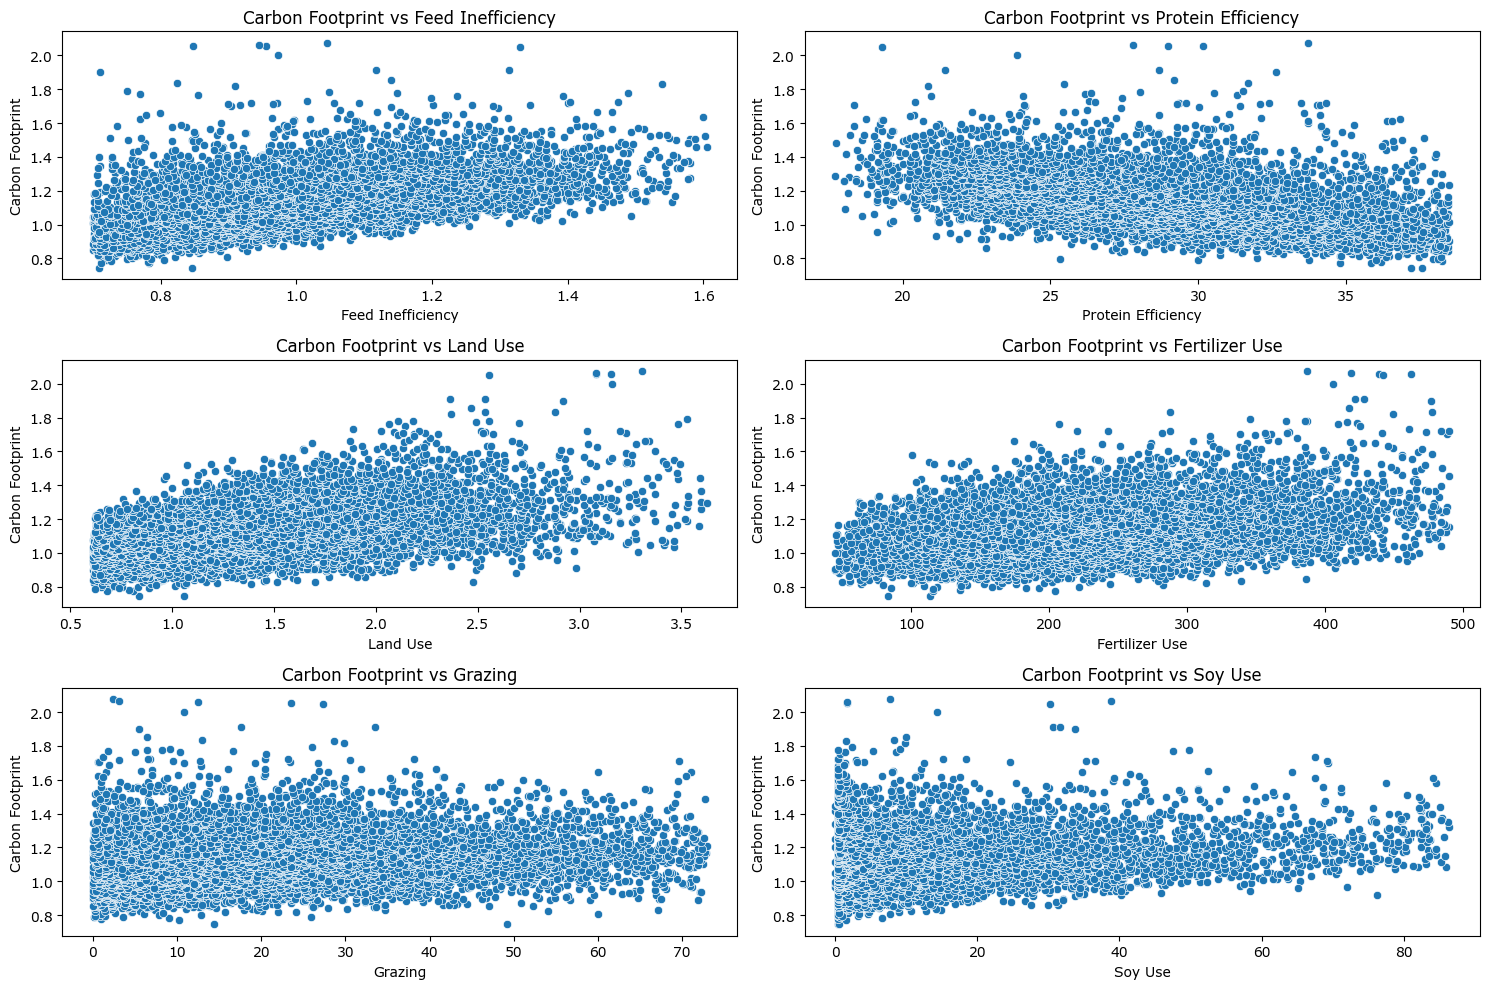

In [15]:
# Create individual scatter plots for each variable against "Carbon_footprint"
variables = ["Feed_inefficiency", "Protein_efficiency", "Land_use", "Fertilizer_use", "Grazing", "Soy_use"]

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through the variables to create scatter plots
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=variable, y="Carbon_footprint")
    plt.title(f"Carbon Footprint vs {variable.replace('_', ' ').title()}")
    plt.xlabel(variable.replace('_', ' ').title())
    plt.ylabel("Carbon Footprint")

plt.tight_layout()
plt.show()

              

## Regression Model

In [16]:
# Separate features and target
target = 'Carbon_footprint'
X = df.drop(columns=[target])
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}


In [17]:
# Create a dictionary to store pipelines and results
results = {}

# Create and evaluate pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('regressor', model)  # Model
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # Store results
    results[name] = mse

In [18]:
# Print all results
print("\nAll model results:")
for name, mse in results.items():
    print(f"{name}: Mean Squared Error = {mse:.4f}")


All model results:
Linear Regression: Mean Squared Error = 0.0021
Ridge Regression: Mean Squared Error = 0.0021
Lasso Regression: Mean Squared Error = 0.0221
Random Forest Regression: Mean Squared Error = 0.0010
Gradient Boosting Regression: Mean Squared Error = 0.0006


### OLS MODEL

In [19]:
# Define the independent variables (X) and the dependent variable (y)
X = df[['Feed_inefficiency', 'Protein_efficiency', 'Animal_mortality', 'Fertilizer_use', 'Land_use', 'Soy_use', 'Permanent_grassland', 'Grazing', 'Manure_biogas', 'Renewable_electricity_use']]
y = df['Carbon_footprint']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Carbon_footprint   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     9570.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Likelihood:                 16573.
No. Observations:               10000   AIC:                        -3.312e+04
Df Residuals:                    9989   BIC:                        -3.305e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Conclusion for Arla Foods: Data-Driven Decarbonization Project

In this analysis, we explored various factors affecting the carbon footprint of dairy farms under Arla Foods. By examining key variables such as feed inefficiency, protein efficiency, animal mortality, fertilizer use, land use, soy use, grazing practices, and renewable electricity use, we aimed to understand their impact on carbon emissions and identify opportunities for reducing the carbon footprint in dairy production.

**Key Findings:**

1. **Feed Inefficiency and Carbon Footprint:**
   - Feed inefficiency was found to have a strong positive correlation with carbon footprint, indicating that farms with higher feed inefficiencies tend to have higher carbon emissions. This suggests that improving feed efficiency could be a significant lever for reducing emissions.

2. **Impact of Fertilizer Use:**
   - Fertilizer use showed a direct correlation with both animal mortality and protein efficiency. High fertilizer use was associated with increased animal mortality, which may indicate negative health impacts on livestock. However, it also contributed positively to protein efficiency, reflecting a trade-off between animal health and productivity.

3. **Land Use and Soy Use:**
   - Both land use and soy use were strongly correlated with higher carbon footprints. The extensive use of land and soy in feed production highlights the environmental costs associated with sourcing and cultivating feed ingredients.

4. **Grazing Practices:**
   - Grazing showed a negative correlation with carbon footprint, suggesting that more sustainable grazing practices could help reduce emissions. However, the effect size was smaller compared to other factors.

5. **Renewable Electricity and Manure Biogas:**
   - The use of renewable electricity and manure biogas was found to be less impactful on the overall carbon footprint compared to other factors. However, farms that adopted these practices showed some reduction in emissions, indicating their potential as supplementary measures for decarbonization.

6. **Regression Analysis:**
   - Regression models confirmed that feed inefficiency, land use, soy use, and fertilizer use were the most significant predictors of carbon footprint. The OLS model achieved an R-squared value of 0.905, indicating that the selected variables explained 90.5% of the variance in carbon footprint.

**Recommendations:**

- **Improve Feed Efficiency:**
  Arla Foods should prioritize improving feed efficiency across its farms. This can be achieved through better feed formulation, optimizing feeding practices, and selecting high-quality feed ingredients that require less input for the same output.

- **Optimize Fertilizer Use:**
  While fertilizer is necessary for productivity, its use should be carefully managed to avoid adverse effects on animal health. Implementing precision agriculture techniques and alternative fertilization methods may help in optimizing fertilizer use.

- **Reduce Land and Soy Use:**
  Efforts should be made to reduce the dependency on extensive land use and soy for feed production. Exploring alternative protein sources and adopting more efficient land management practices could contribute to lower carbon emissions.

- **Enhance Grazing Management:**
  Promoting sustainable grazing practices, such as rotational grazing, can help reduce carbon footprint while maintaining animal welfare and productivity.

- **Adopt Renewable Energy:**
  Although the impact of renewable energy on carbon footprint was less pronounced, expanding the use of renewable electricity and manure biogas could still contribute to the overall sustainability of the farms.

**Future Perspectives:**

Future research could explore the long-term impacts of these interventions on both carbon footprint and farm productivity. Additionally, investigating the feasibility and cost-effectiveness of implementing these recommendations at scale would be crucial for Arla Foods' decarbonization strategy. Integrating advanced technologies like precision agriculture, genetic improvements in livestock, and circular economy practices could further enhance sustainability efforts.